In [1]:
def BBands(data, period=20, std_num=2): 
    
    # 計算布林通道 上軌、中線與下軌:
    res = data.copy(deep=True)                                               # 複製 data資料
    res['b_mid'] = data['Close'].rolling(period).mean()                      # 計算中線(20日均線)
    std = data['Close'].rolling(period).std(ddof=0)                          # 計算用於上下軌的標準差
    res['b_up'] = res['b_mid'] + std * std_num                               # 計算上軌
    res['b_low'] = res['b_mid'] - std * std_num                              # 計算下軌
    
    # 計算布林通道 上軌斜率、中線斜率、通道寬度:
    b_slope = [np.nan]
    ma_slope = [np.nan]
    b_width = [np.nan]
    t = res.index
    for i in range(1, len(res)):  
        b_slope.append((res.loc[t[i], 'b_up']-res.loc[t[i-1], 'b_up'])/res.loc[t[i-1], 'b_up'] * 100)      # 計算布林通道上軌斜率
        ma_slope.append((res.loc[t[i], 'b_mid']/res.loc[t[i-1], 'b_mid']-1) * 100)   # 計算中線斜率
        b_width.append((res.loc[t[i], 'b_up']/res.loc[t[i], 'b_low']-1) * 100)       # 計算布林通道寬度
    res['bband_slope'] = b_slope
    res['bband_width'] = b_width
    res['mid_slope'] = ma_slope
    return res

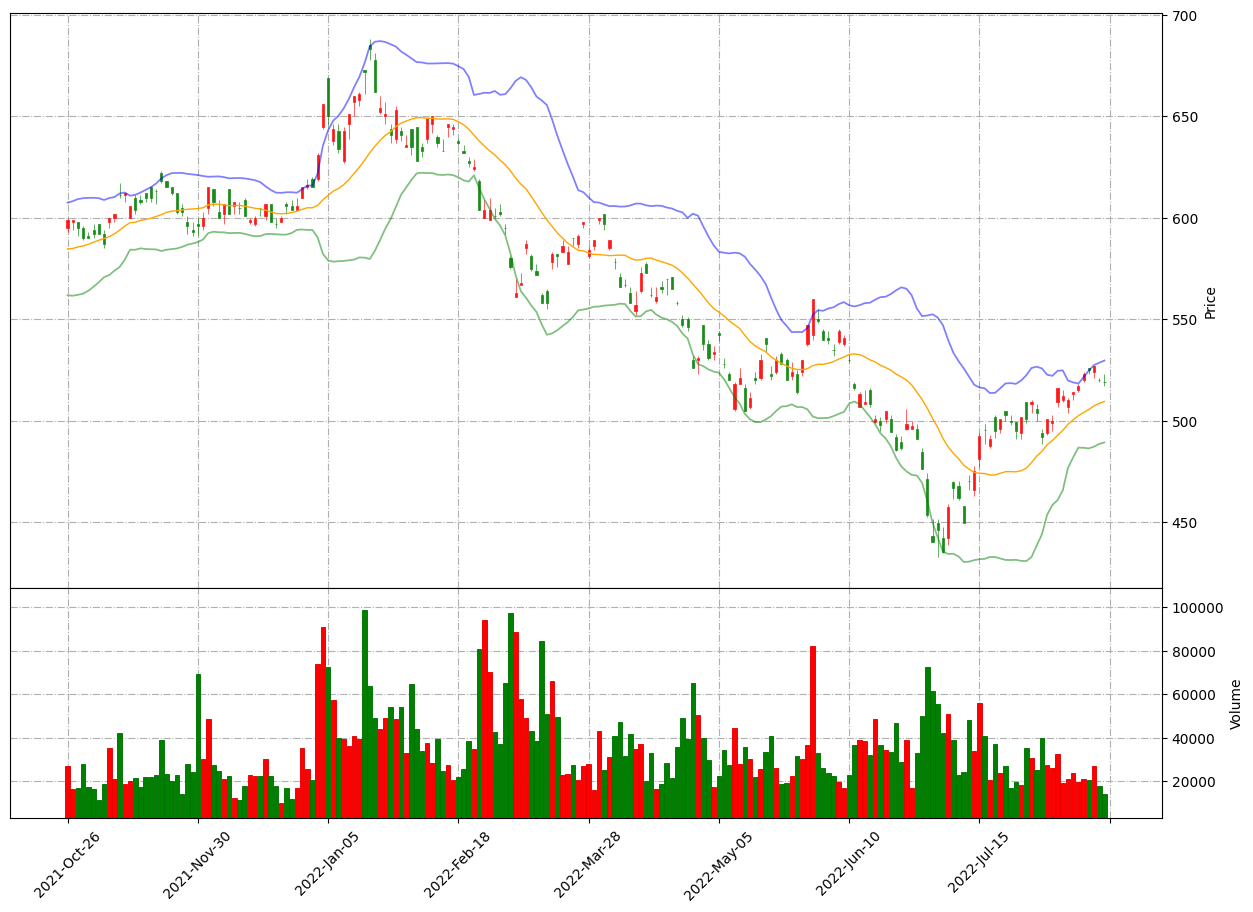

In [6]:
# 繪製簡易布林通道
import numpy as np
import pandas as pd
import mplfinance as mpf

SData = pd.read_csv('2330.csv',index_col='Date')       # 讀取股價檔案
SData.index = pd.DatetimeIndex(SData.index)            # 更改時間格式
bbands_data = BBands(SData)                            # 將股價資訊經過BBands函式計算
day_num = 200                                          # 設定顯示股價資訊的天數

# 繪製布林通道線圖

addplots = [
            mpf.make_addplot(bbands_data['b_mid'][-day_num:], panel=0, color='orange', alpha=1, width=1, secondary_y=False),
            mpf.make_addplot(bbands_data['b_up'][-day_num:], color = 'blue', alpha=0.5),
            mpf.make_addplot(bbands_data['b_low'][-day_num:], color = 'green', alpha=0.5)
           ]

# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',              # 上漲顏色
                                 down='green',          # 下跌顏色
                                 edge='i',              # 隱藏 K 線邊緣
                                 volume='in',           # 成交量用同樣的顏色
                                 inherit=True)          # 繼承其他參數
# 設置圖型呈現
my_style = mpf.make_mpf_style(gridaxis='both',          # 設置網格
                              gridstyle='-.',           # 設定網格花樣
                              y_on_right=True,          # y 座標放右邊
                              marketcolors=my_color)    # 設定k線圖顏色

kwargs = dict(type = 'candle', 
              figscale = 2,                             # 設定圖型大小
              style = my_style)

_panel = 2
mpf.plot(SData.iloc[-day_num:,:],
         **kwargs,
         num_panels=_panel,           # 設定總層數
         main_panel=0,                # 設定 K 線圖層數
         volume=True,                 # 設定是否繪製成交量 
         volume_panel=_panel - 1,     # 設定成交量層數             
         show_nontrading=False,       # 忽略非交易日
         tight_layout=False,          # 設定布局方式
         addplot = addplots)

In [7]:
/

In [8]:
import numpy as np
import pandas as pd
SData = pd.read_csv('2330.csv',index_col='Date')       # 讀取股價檔案
SData.index = pd.DatetimeIndex(SData.index)            # 更改時間格式
bbands_data = double_BBands(SData)                     # 將股價資訊經過BBands函式計算

In [9]:
bbands_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'b_mid', 'b_up', 'b_up_long',
       'b_low', 'b_low_long', 'bband_slope', 'bband_width', 'mid_slope'],
      dtype='object')

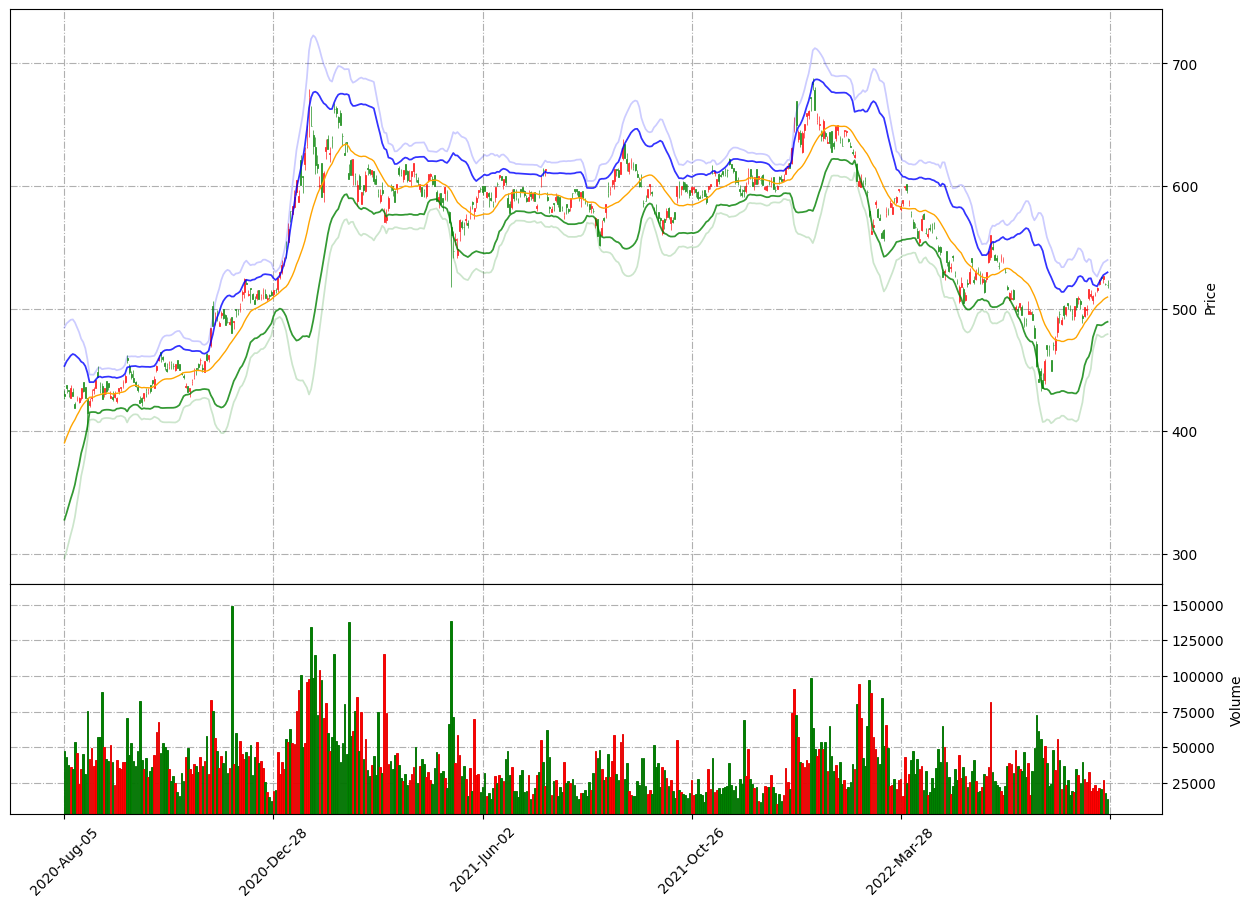

In [10]:
# 繪製簡易布林通道
import numpy as np
import mplfinance as mpf

SData = pd.read_csv('2330.csv',index_col='Date')       # 讀取股價檔案
SData.index = pd.DatetimeIndex(SData.index)            # 更改時間格式
bbands_data = double_BBands(SData)                     # 將股價資訊經過BBands函式計算

# range
day_num = '2020-05-03'                        # 設定顯示股價資訊起始日期
day_end = '2020-08-15'                        # 設定顯示股價資訊結束日期
day_num = 500

# 繪製布林通道線圖
addplots = [
    mpf.make_addplot(bbands_data['b_mid'][-day_num:], panel=0, color='orange', alpha=1, width=1, secondary_y=False),
    mpf.make_addplot(bbands_data['b_mid_long'][-day_num:], panel=0, color='orange', alpha=1, width=1, secondary_y=False),
    mpf.make_addplot(bbands_data['b_up'][-day_num:], color = 'blue', alpha=0.8),
    mpf.make_addplot(bbands_data['b_up_long'][-day_num:], color = 'blue', alpha=0.2),
    mpf.make_addplot(bbands_data['b_low'][-day_num:], color = 'green', alpha=0.8),
    mpf.make_addplot(bbands_data['b_low_long'][-day_num:], color = 'green', alpha=0.2)
]

# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',              # 上漲顏色
                                 down='green',          # 下跌顏色
                                 edge='i',              # 隱藏 K 線邊緣
                                 volume='in',           # 成交量用同樣的顏色
                                 inherit=True)          # 繼承其他參數
# 設置圖型呈現
my_style = mpf.make_mpf_style(gridaxis='both',          # 設置網格
                              gridstyle='-.',           # 設定網格花樣
                              y_on_right=True,          # y 座標放右邊
                              marketcolors=my_color)    # 設定k線圖顏色

kwargs = dict(type = 'candle', 
              figscale = 2,                             # 設定圖型大小
              style = my_style)

_panel = 2
mpf.plot(SData.iloc[-day_num:,:],
         **kwargs,
         num_panels=_panel,           # 設定總層數
         main_panel=0,                # 設定 K 線圖層數
         volume=True,                 # 設定是否繪製成交量 
         volume_panel=_panel - 1,     # 設定成交量層數             
         show_nontrading=False,       # 忽略非交易日
         tight_layout=False,          # 設定布局方式
         addplot = addplots)

In [4]:
import detail_tool as t
dir(t)
import numpy as np
import pandas as pd
SData = pd.read_csv('2330.csv',index_col='Date')       # 讀取股價檔案
SData.index = pd.DatetimeIndex(SData.index)            # 更改時間格式
bbands_data = t.double_BBands(SData)                   # 將股價資訊經過BBands函式計算

print(bbands_data)

             Open   High    Low  Close  Volume    b_mid        b_up  \
Date                                                                  
2017-01-03  181.5  183.5  181.0  183.0   23551      NaN         NaN   
2017-01-04  183.0  184.0  181.5  183.0   24482      NaN         NaN   
2017-01-05  182.0  183.5  181.5  183.5   21374      NaN         NaN   
2017-01-06  184.0  184.5  183.5  184.0   23121      NaN         NaN   
2017-01-09  184.0  185.0  183.0  184.0   18584      NaN         NaN   
...           ...    ...    ...    ...     ...      ...         ...   
2022-08-15  520.0  524.0  519.0  523.0   21204  504.050  521.453735   
2022-08-16  526.0  526.0  523.0  525.0   20672  505.525  524.691312   
2022-08-17  524.0  527.0  521.0  527.0   27023  507.325  527.435383   
2022-08-18  520.0  521.0  519.0  520.0   17765  508.575  528.573187   
2022-08-19  519.0  523.0  517.0  519.0   13950  509.475  529.647940   

             b_up_long       b_low  b_low_long  bband_slope  bband_width  \
